### Exercise 04
### Name: Chathuranga M.M.P.
### Index No: 190108X

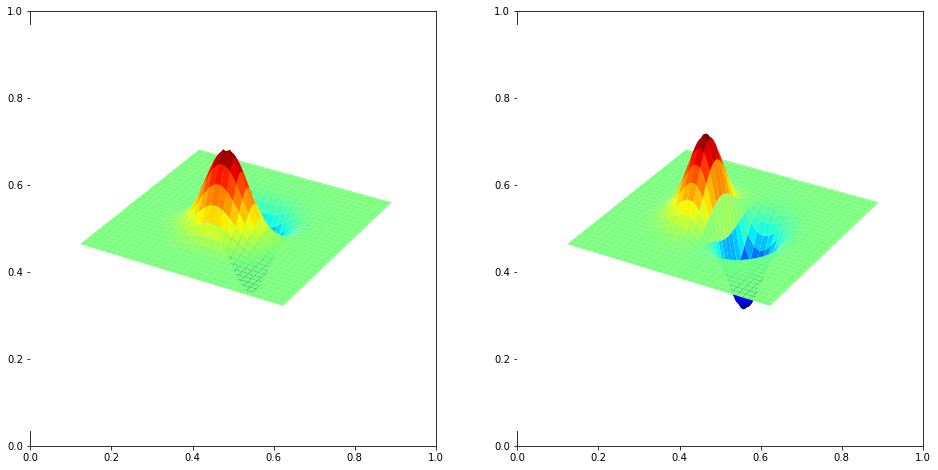

In [28]:
# Question 1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

delta=0.1
xx,yy=np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
sigma=1
gaussian=np.exp(-(xx**2+yy**2)/(2*sigma**2))
gaussian/=np.sum(gaussian)

sobel_v=np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
gaussian_x=cv.filter2D(gaussian,-1,sobel_v)

sobel_h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)
gaussian_y=cv.filter2D(gaussian,-1,sobel_h)

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1=fig.add_subplot(121,projection='3d')
ax2=fig.add_subplot(122,projection='3d')
surf=ax1.plot_surface(xx,yy,gaussian_x,cmap=cm.jet,linewidth=0,antialiased=True)
surf2=ax2.plot_surface(xx,yy,gaussian_y,cmap=cm.jet,linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()

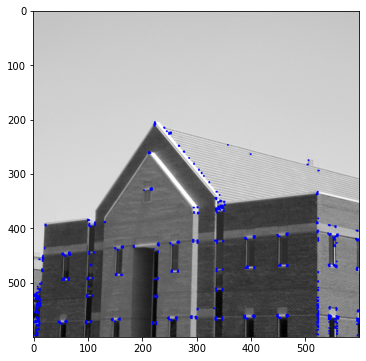

In [29]:
# Question 2

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'building.tif',cv.IMREAD_COLOR)
assert img is not None

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray=np.float32(gray)
dst=cv.cornerHarris(gray,2,3,0.04)

dst=cv.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]

fig,ax=plt.subplots(1,1,figsize=(15,6))
ax.imshow(img)

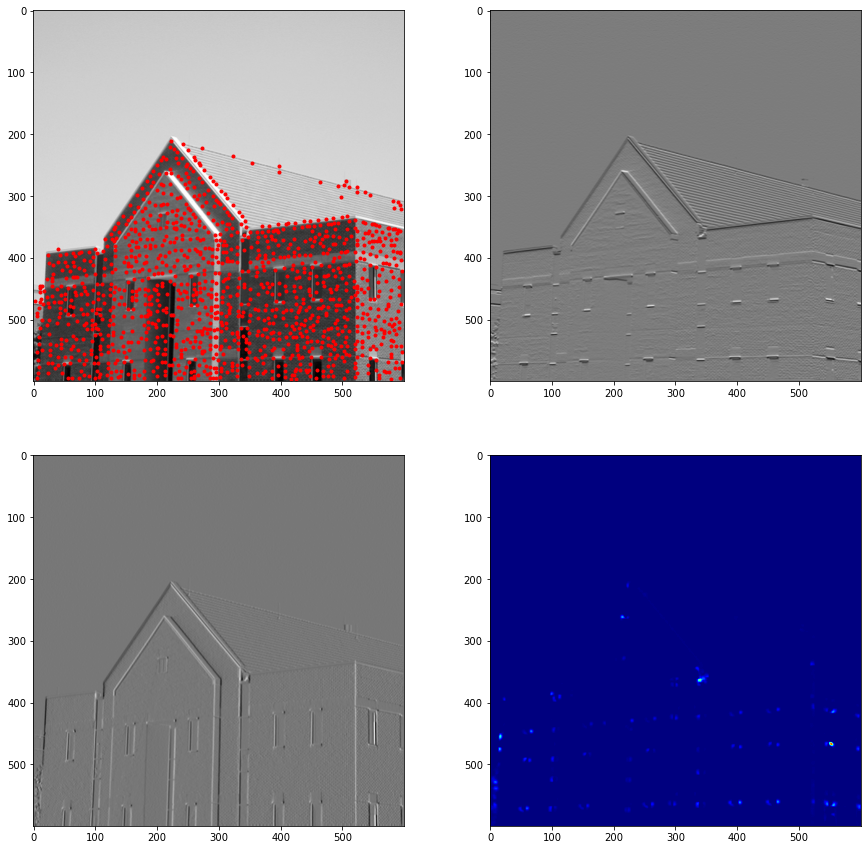

In [30]:
# Question 3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max
from matplotlib import cm
%matplotlib inline

img=cv.imread(r'building.tif',cv.IMREAD_COLOR)
assert img is not None

I=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I=np.float32(I)
sobel_v=np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
sobel_h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)

Ix=cv.filter2D(I,-1,sobel_v)
Iy=cv.filter2D(I,-1,sobel_h)

sigma=3
ksize=7

m11=cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12=cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21=m12
m22=cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det=m11*m22-m12*m21
trace=m11+m22
alpha=0.04

R=det-alpha*trace**2
R[R<1e4]=0
coordinates=peak_local_max(R,min_distance=2)

fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,1].imshow(Ix+127,cmap='gray')
ax[1,0].imshow(Iy+127,cmap='gray')
ax[1,1].imshow(R+127,cmap=cm.jet)

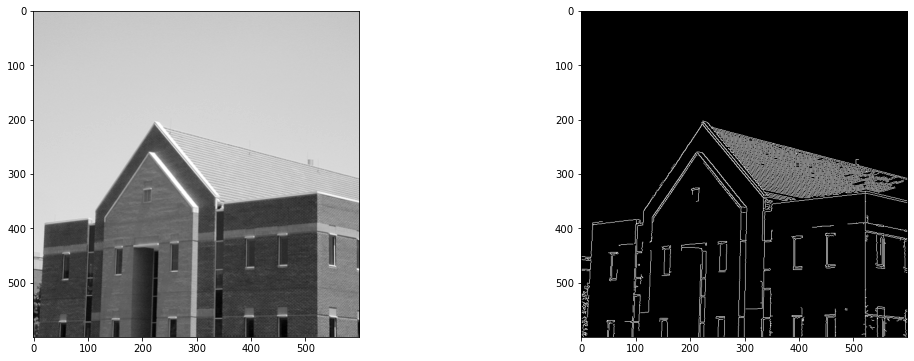

In [31]:
# Question 4

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'building.tif',cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,100,200)

fig,ax=plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(img,cmap='gray')

ax[1].imshow(edges,cmap='gray')